In [1]:
#initial
# !pip install ctgan

In [1]:
# import the library we will use
from table_evaluator import TableEvaluator
from ctgan import CTGANSynthesizer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("../train.csv")

In [4]:
train.head()

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,AURO,1/2/2021 0:30,19.2,temp_wxt,False,2,-1,0,1
1,AURO,1/2/2021 4:30,19.8,temp_wxt,False,2,-1,0,1
2,AURO,1/2/2021 5:30,19.5,temp_wxt,False,2,-1,0,1
3,AURO,1/2/2021 7:30,18.5,temp_wxt,False,2,-1,0,1
4,AURO,2/16/2021 2:30,17.7,temp_wxt,False,2,-1,0,1


In [3]:
len(train)

6593274

In [6]:
false_group = train.loc[train['target'] == False]
len(false_group)

6358102

In [4]:
true_group = train.loc[train['target'] != False]
len(true_group)

235172

In [8]:
false_group.head()

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,AURO,1/2/2021 0:30,19.2,temp_wxt,False,2,-1,0,1
1,AURO,1/2/2021 4:30,19.8,temp_wxt,False,2,-1,0,1
2,AURO,1/2/2021 5:30,19.5,temp_wxt,False,2,-1,0,1
3,AURO,1/2/2021 7:30,18.5,temp_wxt,False,2,-1,0,1
4,AURO,2/16/2021 2:30,17.7,temp_wxt,False,2,-1,0,1


In [7]:
#prepare data for CTGAN library
discrete_columns = [
    'Station',
    'Ob',
    'measure',
    'target',
]


Sample from false group and generate synthetic data from CTGAN.

In [10]:
sampled_false_group = false_group.sample(frac=0.0005, replace=True, random_state=1)


In [11]:
sampled_false_group

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
4412113,PLYM,3/26/2021 10:43,7.500,ws02,False,0,0,0,-1
4791194,ROCK,1/3/2021 9:29,0.291,sm,False,0,-1,-1,1
4020915,NEWL,6/22/2021 17:27,0.187,sm,False,0,-1,-1,0
497968,BEAR,7/1/2021 7:27,323.400,sr,False,4,0,-1,-1
5150620,SILR,1/5/2021 4:09,0.363,sm,False,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...
6466129,WINE,9/23/2021 21:27,0.170,sm,False,0,-1,-1,1
4898067,SALI,3/31/2021 13:47,0.584,sm,False,4,-1,-1,-1
3393150,MITC,5/4/2021 12:41,91.900,par,False,4,0,-1,-1
6049767,WAYN,10/19/2021 7:42,1.220,temp10,False,1,-1,-1,2


In [12]:
len(sampled_false_group)

3179

In [13]:
#train GAN model with false group
ctgan_false = CTGANSynthesizer(epochs=5)
ctgan_false.fit(sampled_false_group, discrete_columns)

C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_

In [14]:
#generate synthetic false group data 
synthetic_false_data = ctgan_false.sample(3000)
print(synthetic_false_data.head(5))

  Station               Ob        value   measure  target  R_flag  I_flag  \
0    BAHA  10/23/2021 8:46    -0.115477  temp_wxt   False       0       0   
1    SILR  12/16/2021 5:56   -12.189837      ws06   False       0       0   
2    SASS  11/10/2021 1:17  1486.731623      pres   False       0       0   
3    GOLD   5/7/2021 22:45    87.228129        sr   False       0       2   
4    JACK  1/16/2021 16:04   703.419511       par   False       3       0   

   Z_flag  B_flag  
0       0       0  
1      -1       0  
2       0       2  
3       0      -1  
4       0       1  


Sample from true group and generate synthetic data from CTGAN.

In [5]:
sampled_true_group = true_group.sample(frac=0.1, replace=True, random_state=1)
len(sampled_true_group)

23517

In [ ]:
#train GAN model with false group
ctgan_true = CTGANSynthesizer(epochs=5)
ctgan_true.fit(sampled_true_group, discrete_columns)

C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_

prepare synthetic data with 3000 false and 3000 true cases

In [17]:
#generate synthetic false group data 
synthetic_true_data = ctgan_true.sample(3000)
print(synthetic_true_data.head(5))


  Station               Ob       value   measure  target  R_flag  I_flag  \
0    LILE    1/6/2021 4:39   12.532473      pres    True       0      -1   
1    BAHA    3/4/2021 4:58   20.608330    precip    True       0      -1   
2    GOLD    1/9/2021 3:30   15.836001        sr    True       0      -1   
3    TAYL  8/19/2021 16:06  157.094013  temp_wxt    True       0       0   
4    WAYN   3/8/2021 11:43   23.175124    temp10    True       0      -1   

   Z_flag  B_flag  
0       0      -1  
1       0       2  
2       0       0  
3       0       0  
4       0      -1  


In [18]:
print(len(synthetic_true_data),len(synthetic_false_data))

3000 3000


In [19]:
#combine synthetic data to balenced data and preprocessing
raw_synthetic = pd.concat([synthetic_true_data, synthetic_false_data])
len(raw_synthetic)
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  raw_synthetic[discrete_column] = lb_make.fit_transform(raw_synthetic[discrete_column])

raw_synthetic

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,22,553,12.532473,3,1,0,-1,0,-1
1,1,2132,20.608330,2,1,0,-1,0,2
2,14,775,15.836001,7,1,0,-1,0,0
3,36,3417,157.094013,10,1,0,0,0,0
4,38,2179,23.175124,9,1,0,-1,0,-1
...,...,...,...,...,...,...,...,...,...
2995,22,2282,-10.991940,7,0,0,0,0,0
2996,8,831,79.594734,6,0,0,2,0,1
2997,18,3671,4.446254,6,0,0,0,0,-1
2998,17,3311,3.774273,11,0,1,0,0,0


In [20]:
#prepare data for evaluation
raw_x = raw_synthetic[["Station", "Ob", "value", "measure", "R_flag", "I_flag", "Z_flag", "B_flag"]]

raw_y = raw_synthetic[["target"]]
print(raw_y.head(),raw_x.head())

   target
0       1
1       1
2       1
3       1
4       1    Station    Ob       value  measure  R_flag  I_flag  Z_flag  B_flag
0       22   553   12.532473        3       0      -1       0      -1
1        1  2132   20.608330        2       0      -1       0       2
2       14   775   15.836001        7       0      -1       0       0
3       36  3417  157.094013       10       0       0       0       0
4       38  2179   23.175124        9       0      -1       0      -1


In [111]:
forest = RandomForestClassifier()
forest.fit(raw_x, raw_y)

importances = forest.feature_importances_


<ipython-input-111-41dc42b44a89>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(raw_x, raw_y)


In [113]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(raw_x.shape[1]):
  print ("{0} : {1}".format(raw_x.columns[indices[ind]],round(importances[indices[ind]], 4)))


Feature importance ranking by Random Forest Model:
value : 0.3666
I_flag : 0.3624
Ob : 0.098
B_flag : 0.0707
measure : 0.0395
Station : 0.0366
Z_flag : 0.0144
R_flag : 0.0118


prepare sampled data for comparation

In [22]:
raw = pd.concat([sampled_false_group, sampled_true_group])
len(raw)
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  raw[discrete_column] = lb_make.fit_transform(raw[discrete_column])


In [23]:
x = raw[["Station", "Ob", "value", "measure", "R_flag", "I_flag", "Z_flag", "B_flag"]]

y = raw[["target"]]
print(raw_y.head(),raw_x.head())

   target
0       1
1       1
2       1
3       1
4       1    Station    Ob       value  measure  R_flag  I_flag  Z_flag  B_flag
0       22   553   12.532473        3       0      -1       0      -1
1        1  2132   20.608330        2       0      -1       0       2
2       14   775   15.836001        7       0      -1       0       0
3       36  3417  157.094013       10       0       0       0       0
4       38  2179   23.175124        9       0      -1       0      -1


prepare imbalenced data for comparation

In [24]:
imbalenced_raw = train.sample(frac=0.0003, replace=True, random_state=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  imbalenced_raw[discrete_column] = lb_make.fit_transform(imbalenced_raw[discrete_column])
len(imbalenced_raw)

1978

In [25]:
ix = imbalenced_raw[["Station", "Ob", "value", "measure", "R_flag", "I_flag", "Z_flag", "B_flag"]]

iy = imbalenced_raw[["target"]]
print(raw_y.head(),raw_x.head())

   target
0       1
1       1
2       1
3       1
4       1    Station    Ob       value  measure  R_flag  I_flag  Z_flag  B_flag
0       22   553   12.532473        3       0      -1       0      -1
1        1  2132   20.608330        2       0      -1       0       2
2       14   775   15.836001        7       0      -1       0       0
3       36  3417  157.094013       10       0       0       0       0
4       38  2179   23.175124        9       0      -1       0      -1


In [26]:
#split the stnthetic data and origin data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 25)
S_X_train, S_X_test, S_y_train, S_y_test = train_test_split(raw_x,raw_y,test_size = 0.25,random_state = 25)
I_X_train, I_X_test, I_y_train, I_y_test = train_test_split(ix,iy,test_size = 0.25,random_state = 25)

In [49]:
test = train.sample(frac=0.0005, replace=True, random_state=25)
len(test)

3297

In [43]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  test[discrete_column] = lb_make.fit_transform(test[discrete_column])
print(test.head())
tx = imbalenced_raw[["Station", "Ob", "value", "measure", "R_flag", "I_flag", "Z_flag", "B_flag"]]

ty = imbalenced_raw[["target"]]

         Station    Ob   value  measure  target  R_flag  I_flag  Z_flag  \
4224132       27   324   0.223        6       0       0      -1      -1   
3236158       20   702   4.644        9       0       0      -1      -1   
1055194        5  2430  89.900        5       0       0      -1       4   
6421821       42  2601   0.163        6       0       0      -1      -1   
5016438       31   656   0.375        6       0       0      -1      -1   

         B_flag  
4224132       2  
3236158       1  
1055194       0  
6421821       1  
5016438       1  


In [44]:
T_X_train, T_X_test, T_y_train, T_y_test = train_test_split(tx,ty,test_size = 0.99,random_state = 25)

In [88]:
print(len(T_X_test))

1959


Test performance with DTC 

In [89]:
# Using balenced simple random sample data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='gini', random_state = 25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Decision Tree: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Decision Tree: Cofusion Matrix for raw data
[[ 749 1145]
 [  42   23]]
The accuracy is: 39.41%


DT: f1=0.037 auc=0.197


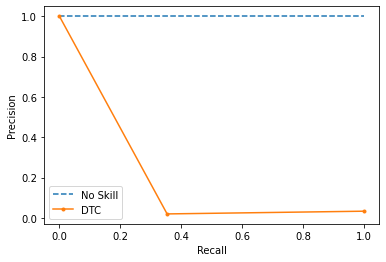

In [90]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DTC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [91]:
# Using synthetic CTGAN data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='gini', random_state = 25)
classifier.fit(S_X_train, S_y_train)
S_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Decision Tree: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Decision Tree: Cofusion Matrix for synthetic data
[[1369  525]
 [  25   40]]
The accuracy is: 71.92%


DT: f1=0.037 auc=0.349


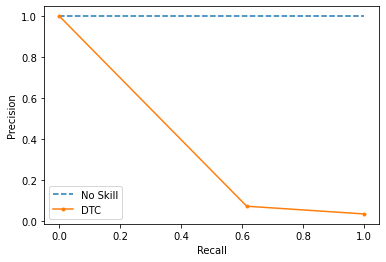

In [92]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DTC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
# Using imbalenced simple random sample data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='gini', random_state = 25)
classifier.fit(I_X_train, I_y_train)
I_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, I_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Decision Tree: Cofusion Matrix for SRS data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Decision Tree: Cofusion Matrix for SRS data
[[1885    9]
 [   4   61]]
The accuracy is: 99.34%


DT: f1=0.037 auc=0.906


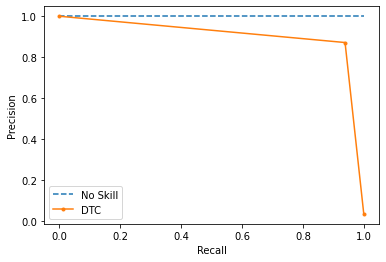

In [94]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DTC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Test performance with LR

In [95]:
# Using balenced simple random sample data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Logistic Regression: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Logistic Regression: Cofusion Matrix for raw data
[[ 811 1083]
 [   5   60]]
The accuracy is: 44.46%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DT: f1=0.099 auc=0.100


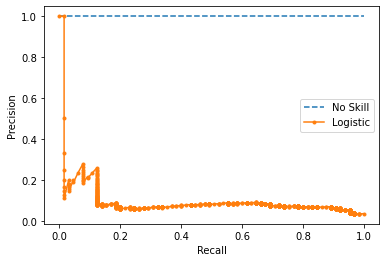

In [96]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [97]:
# Using synthetic CTGAN data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(S_X_train, S_y_train)
S_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Logistic Regression: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Logistic Regression: Cofusion Matrix for synthetic data
[[1527  367]
 [  23   42]]
The accuracy is: 80.09%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DT: f1=0.099 auc=0.104


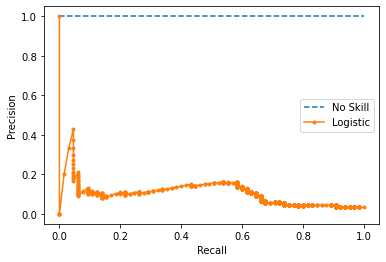

In [98]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
# Using imbalenced simple random sample data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(I_X_train, I_y_train)
I_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, I_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Logistic Regression: Cofusion Matrix for SRS data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Logistic Regression: Cofusion Matrix for SRS data
[[1894    0]
 [  65    0]]
The accuracy is: 96.68%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lijun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DT: f1=0.099 auc=0.091


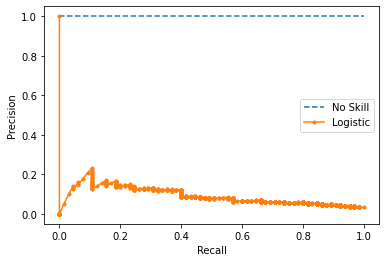

In [100]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Test performance with NB

In [101]:
# Using balenced simple random sample data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Naive Bayes: Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Naive Bayes: Cofusion Matrix for raw data
[[1481  413]
 [  18   47]]
The accuracy is: 78.00%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


DT: f1=0.179 auc=0.092


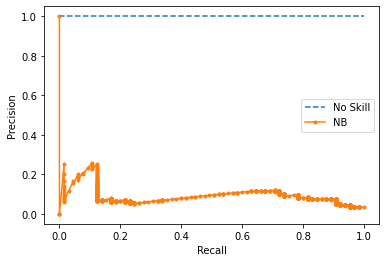

In [102]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='NB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [103]:
# Using synthetic CTGAN data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(S_X_train, S_y_train)
S_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Naive Bayes: Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Naive Bayes: Cofusion Matrix for synthetic data
[[ 357 1537]
 [   6   59]]
The accuracy is: 21.24%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


DT: f1=0.179 auc=0.115


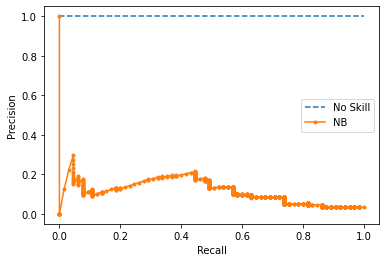

In [104]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='NB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [105]:
# Using imbalenced simple random sample data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(I_X_train, I_y_train)
I_y_pred = classifier.predict(T_X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(T_y_test, I_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Naive Bayes: Cofusion Matrix for SRS data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Naive Bayes: Cofusion Matrix for SRS data
[[1825   69]
 [  57    8]]
The accuracy is: 93.57%


C:\Users\lijun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


DT: f1=0.179 auc=0.101


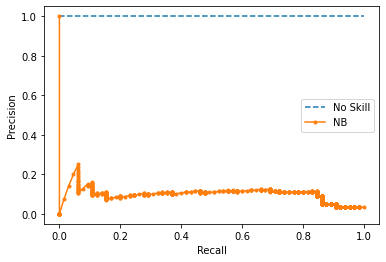

In [106]:
lr_probs = classifier.predict_proba(T_X_test)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(T_y_test, lr_probs)
lr_f1, lr_auc = f1_score(T_y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(T_y_test[T_y_test==1]) / len(T_y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='NB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()